# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

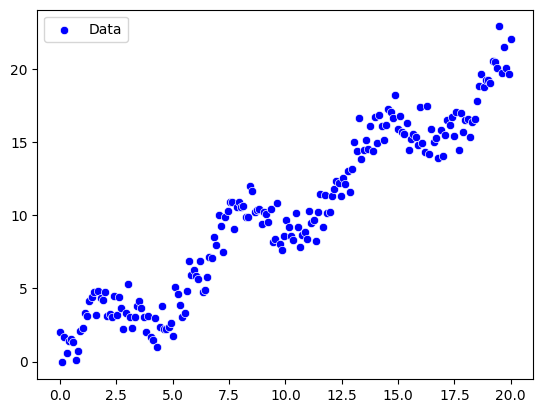

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)

In [5]:
df[0]


(tensor([0.]), tensor([2.0171]))

In [143]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [144]:
data_point = next(iter(training_loader))
data_point


[tensor([[18.4925]]), tensor([[17.7987]])]

In [145]:
import torch.nn.functional as F

In [146]:
# construct the model using Linear block
in_features = 1
out_features = 1

class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super(Model,self).__init__()
    self.linear1 = nn.Linear(in_features=in_features, out_features=64)
    self.linear2 = nn.Linear(in_features=64, out_features=32)
    self.linear3 = nn.Linear(in_features=32, out_features=out_features)
    self.relu1 = nn.LeakyReLU()
    self.relu2 = nn.LeakyReLU()

  def forward(self,x):

    x = self.relu1(self.linear1(x))
    x = self.relu2(self.linear2(x))
    x = self.linear3(x)
    return x


In [147]:
loss_fn = nn.MSELoss()

In [148]:
# model_2 = Model(in_features,out_features)
model_2 = nn.Sequential(
    nn.Linear(in_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.01)

In [159]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):


    model.to(device)

    for epoch in range(epochs):

        model = model.train()

        running_loss = 0

        for inputs , labels in training_loader:

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
        print(running_loss)



In [150]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [172]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=500
                )


350.7878251504153
337.1662360318078
341.6852936454561
299.52712250441255
344.66807517300595
350.0105185468856
324.87022507990787
351.3191150015118
324.8738775245329
338.9451653422939
348.5197874582591
370.68885460665115
330.95919222646535
355.78351197062875
336.6450755835431
366.1107686245814
334.7228709998308
342.0673692082455
313.6140018690203
319.118738114772
318.88444796195927
283.6233888082206
357.50896052104144
338.2722765504386
352.384803705776
325.2608528553974
349.7591710260431
359.38357525835454
349.78143412436475
339.702818669939
340.0723230538679
356.3430258093322
353.7041912605273
339.8139047383088
329.0802683921356
335.55628333662753
345.64900041569854
347.49883990578746
368.8668901107849
357.76545596403594
333.5053587122602
332.8365372421722
360.5330776458504
327.25530620084555
329.53728191655955
349.8275882269845
325.5435787347851
325.3180032185446
349.1744186009746
322.1397344689176
308.6262320209971
335.429308303952
321.7931637194997
347.83756615508537
374.64113923007

In [173]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

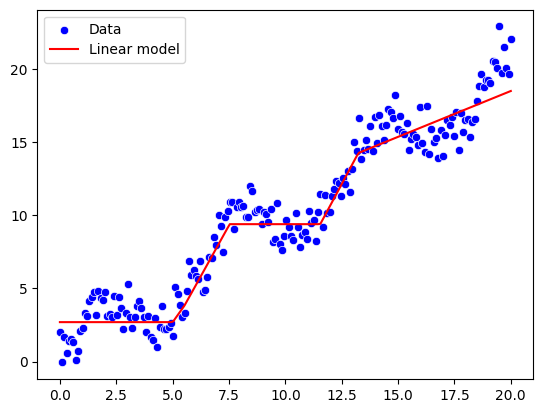

In [174]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
